# Supervised Learning (1) - Linear Regression
## Machine Learning Lectures by the ESA Data Analytics Team for Operations (DATO)
#### [José Martínez Heras](https://www.linkedin.com/in/josemartinezheras/)

## Resouces
This notebook is best followed when watched along to its corresponding [linear regression with Frankfurt Airbnb data **video**](https://dlmultimedia.esa.int/download/public/videos/2048/03/003/4803_003_AR_EN.mp4)

The tutorial about Linear Regression can be found in the [2018-MachineLearning-Lectures-ESA **GitHub**](https://github.com/jmartinezheras/2018-MachineLearning-Lectures-ESA)

## Goal of today's project
Predict how much it will cost a overnight stay in Frankfurt at Airbnb


## Import libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42)

## Load data

Get the Airbnb data here http://tomslee.net/airbnb-data-collection-get-the-data

In particular, the Frankfurt data can be downloaded at: https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip

We will be using only the most recent data from 22.06.2017

In [2]:
frankfurt = pd.read_csv('datasets/tomslee_airbnb_frankfurt_1360_2017-06-22.csv')

In [3]:
frankfurt.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,14816898,1360,92278018,Shared room,NaN,Frankfurt,NaN,Bahnhofsviertel,51,4.5,10,1.0,NaN,80.0,NaN,2017-06-22 15:39:57.993776,50.108833,8.668395,0101000020E6100000AE9E93DE37562140DFDC5F3DEE0D...
1,15294143,1360,62507234,Shared room,NaN,Frankfurt,NaN,Westend-Süd,27,4.5,2,1.0,NaN,52.0,NaN,2017-06-22 15:39:56.482515,50.120212,8.657187,0101000020E610000074B680D07A5021401B4B581B630F...
2,6751387,1360,17826701,Shared room,NaN,Frankfurt,NaN,Rödelheim,0,0.0,2,1.0,NaN,35.0,NaN,2017-06-22 15:39:54.515975,50.128278,8.596030,0101000020E6100000A9DE1AD82A312140ED65DB696B10...
3,15637480,1360,85072001,Shared room,NaN,Frankfurt,NaN,Oberrad,0,0.0,6,1.0,NaN,346.0,NaN,2017-06-22 15:39:52.319758,50.099801,8.722627,0101000020E6100000C669882AFC712140D68D7747C60C...
4,18244045,1360,68408403,Shared room,NaN,Frankfurt,NaN,Innenstadt,0,0.0,2,1.0,NaN,149.0,NaN,2017-06-22 15:39:47.234792,50.115677,8.694514,0101000020E6100000713AC956976321401FF30181CE0E...


## Data Preparation

Find which fields don't contain data

In [4]:
frankfurt.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.995000e+03,1995.0,1.995000e+03,0.0,0.0,1995.000000,1995.000000,1995.000000,1995.000000,0.0,1995.000000,0.0,1995.000000,1995.000000
mean,1.167641e+07,1360.0,4.092822e+07,NaN,NaN,11.171429,2.544110,2.263659,1.099248,NaN,77.532832,NaN,50.117200,8.666842
std,5.467073e+06,0.0,3.603036e+07,NaN,NaN,25.459738,2.368573,1.315237,0.542270,NaN,59.226681,NaN,0.018407,0.035737
min,6.626700e+04,1360.0,1.659300e+04,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,50.024792,8.489325
25%,7.665019e+06,1360.0,1.032169e+07,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,41.000000,NaN,50.105532,8.645188
50%,1.255222e+07,1360.0,2.991108e+07,NaN,NaN,3.000000,4.000000,2.000000,1.000000,NaN,58.000000,NaN,50.116671,8.670427
75%,1.658699e+07,1360.0,6.171958e+07,NaN,NaN,10.000000,5.000000,2.000000,1.000000,NaN,92.000000,NaN,50.124712,8.691819
max,1.942335e+07,1360.0,1.360651e+08,NaN,NaN,465.000000,5.000000,12.000000,8.000000,NaN,864.000000,NaN,50.206080,8.772625


#### drop fields for which we have no data

In [5]:
frankfurt = frankfurt.drop(['country', 'last_modified', 'location', 'borough', 'bathrooms', 'minstay'], axis=1)
frankfurt.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,14816898,1360,92278018,Shared room,Frankfurt,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,15294143,1360,62507234,Shared room,Frankfurt,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,6751387,1360,17826701,Shared room,Frankfurt,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,15637480,1360,85072001,Shared room,Frankfurt,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,18244045,1360,68408403,Shared room,Frankfurt,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


#### drop "irrelavant" information for today

In [6]:
frankfurt = frankfurt.drop(['room_id', 'survey_id','host_id', 'city'], axis=1)
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


In [7]:
frankfurt.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,11.171429,2.544110,2.263659,1.099248,77.532832,50.117200,8.666842
std,25.459738,2.368573,1.315237,0.542270,59.226681,0.018407,0.035737
min,0.000000,0.000000,1.000000,0.000000,10.000000,50.024792,8.489325
25%,1.000000,0.000000,2.000000,1.000000,41.000000,50.105532,8.645188
50%,3.000000,4.000000,2.000000,1.000000,58.000000,50.116671,8.670427
75%,10.000000,5.000000,2.000000,1.000000,92.000000,50.124712,8.691819
max,465.000000,5.000000,12.000000,8.000000,864.000000,50.206080,8.772625


Make sure that there are no missing values (in case we would need to handle them)

In [8]:
frankfurt.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

cool, no missing values

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us improving our problem understanding

### Inspect prices

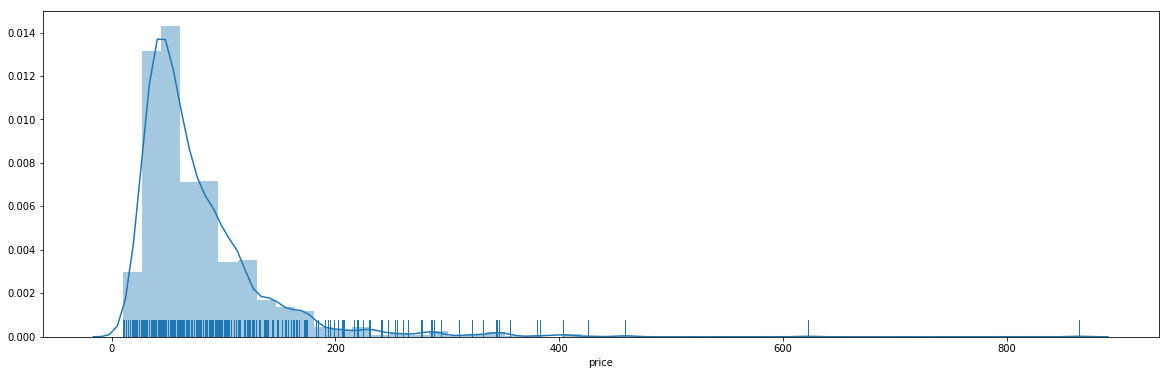

In [9]:
plt.figure(figsize=(20,6))
sb.distplot(frankfurt['price'], rug=True)

### Inspect how the fields affect the price

Let's have a look to the categorical fields: room_type and neighborhood

#### How many different room types there are?

In [10]:
frankfurt['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

#### Which neighborhoods there are in Frankfurt Airbnb?

In [11]:
print(sorted(frankfurt['neighborhood'].unique()))

['Altstadt', 'Bahnhofsviertel', 'Bergen-Enkheim', 'Bockenheim', 'Bonames', 'Bornheim', 'Dornbusch', 'Eckenheim', 'Eschersheim', 'Fechenheim', 'Flughafen', 'Frankfurter Berg', 'Gallus', 'Ginnheim', 'Griesheim', 'Gutleutviertel', 'Harheim', 'Hausen', 'Heddernheim', 'Höchst', 'Innenstadt', 'Kalbach-Riedberg', 'Nied', 'Nieder-Erlenbach', 'Nieder-Eschbach', 'Niederrad', 'Niederursel', 'Nordend-Ost', 'Nordend-West', 'Oberrad', 'Ostend', 'Praunheim', 'Preungesheim', 'Riederwald', 'Rödelheim', 'Sachsenhausen-N.', 'Sachsenhausen-S.', 'Schwanheim', 'Seckbach', 'Sindlingen', 'Sossenheim', 'Unterliederbach', 'Westend-Nord', 'Westend-Süd', 'Zeilsheim']


#### Which room_type has higher prices?

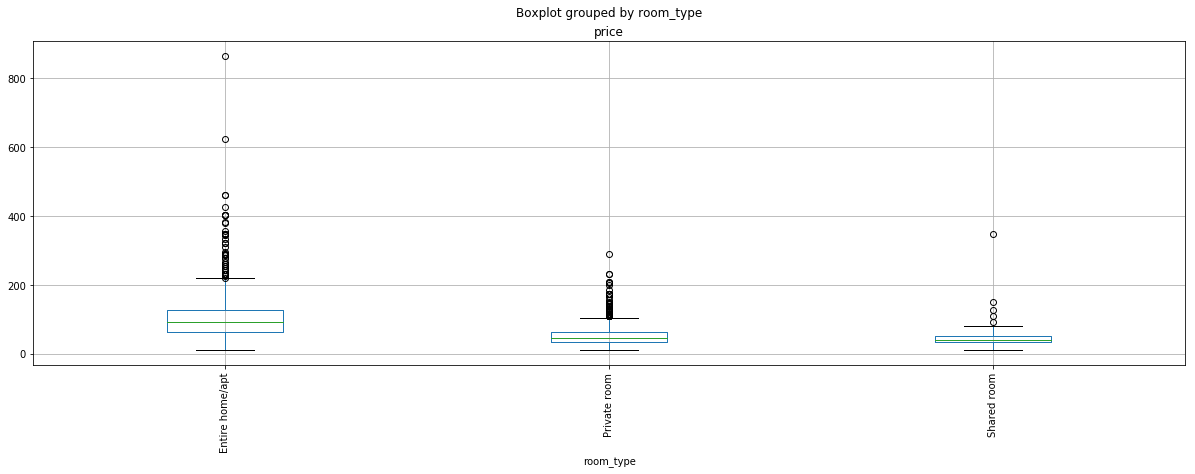

In [12]:
frankfurt.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)

#### Which neighborhoods have higher prices?

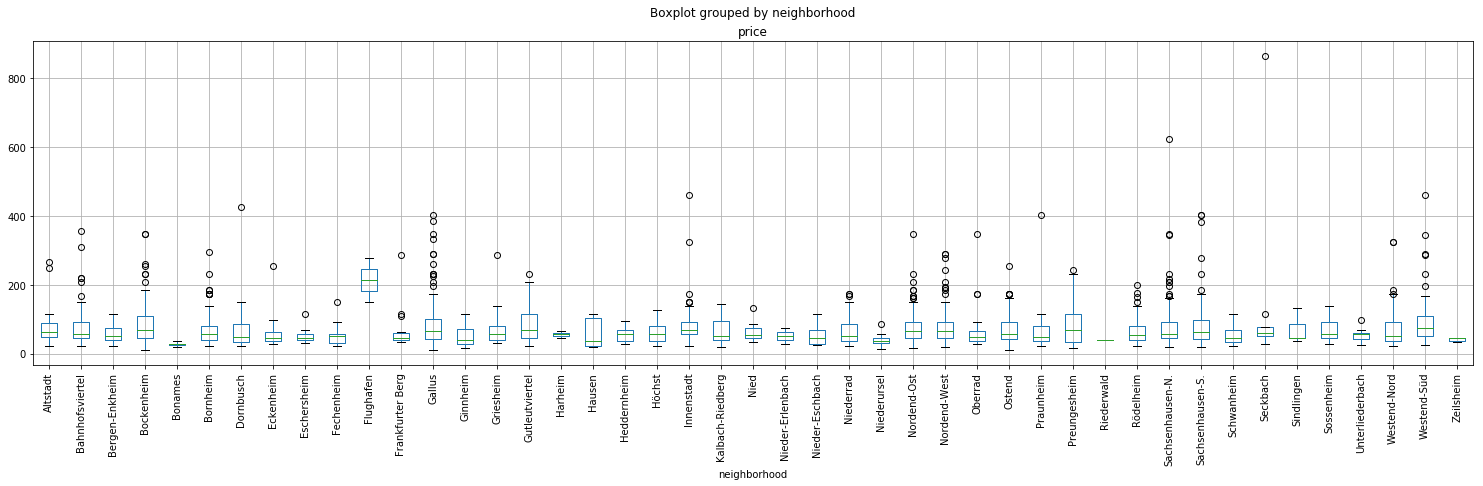

In [13]:
frankfurt.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90);

#### What about longitue and latitude?

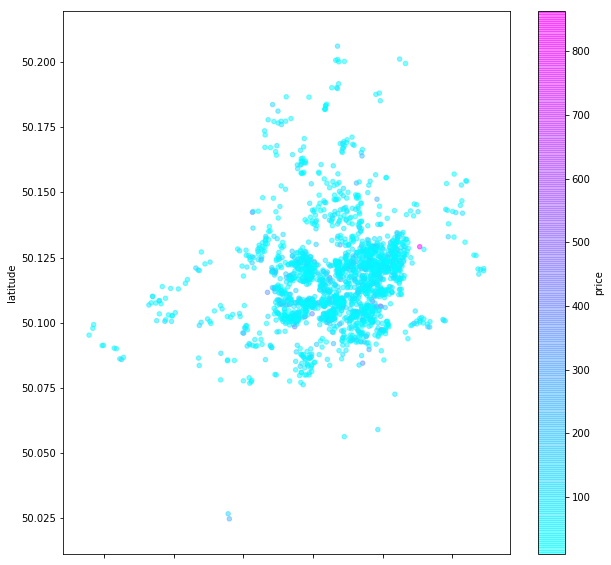

In [14]:
frankfurt.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

When prices are < $200

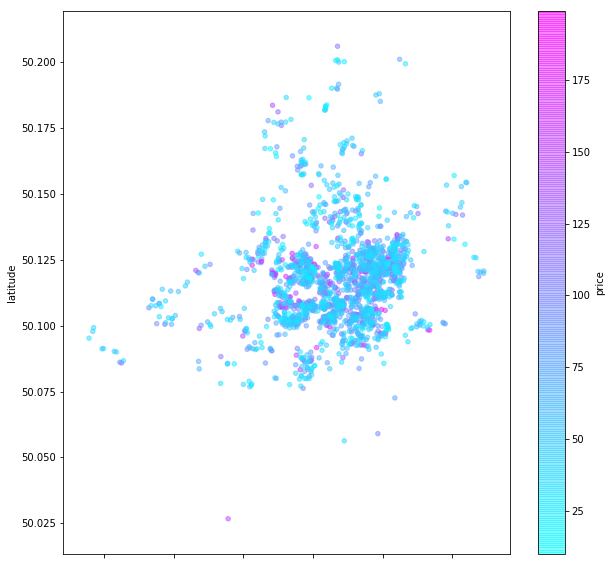

In [15]:
frankfurt[frankfurt['price']<200].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

#### And reviews?

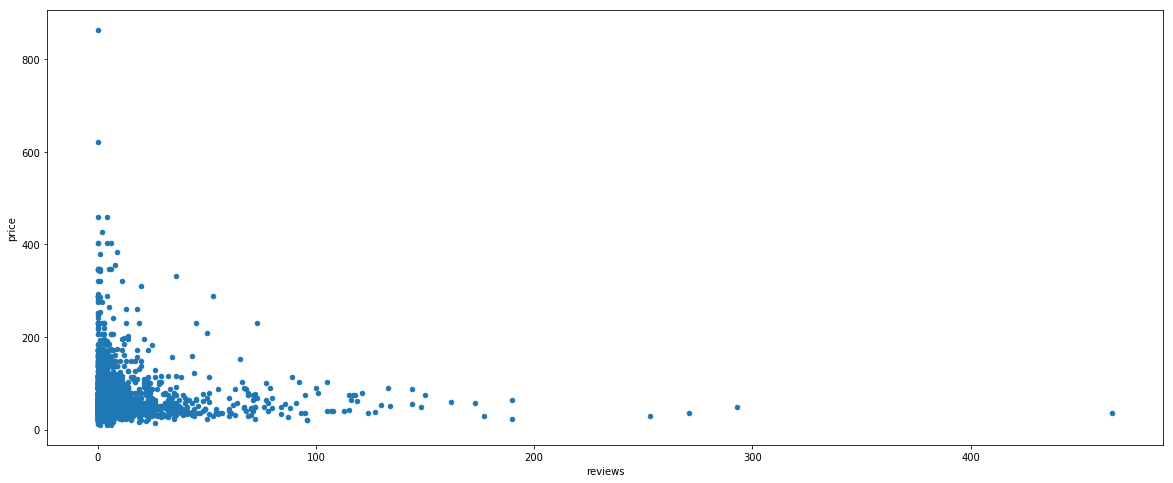

In [16]:
frankfurt.plot.scatter(x='reviews', y='price', figsize=(20,8));

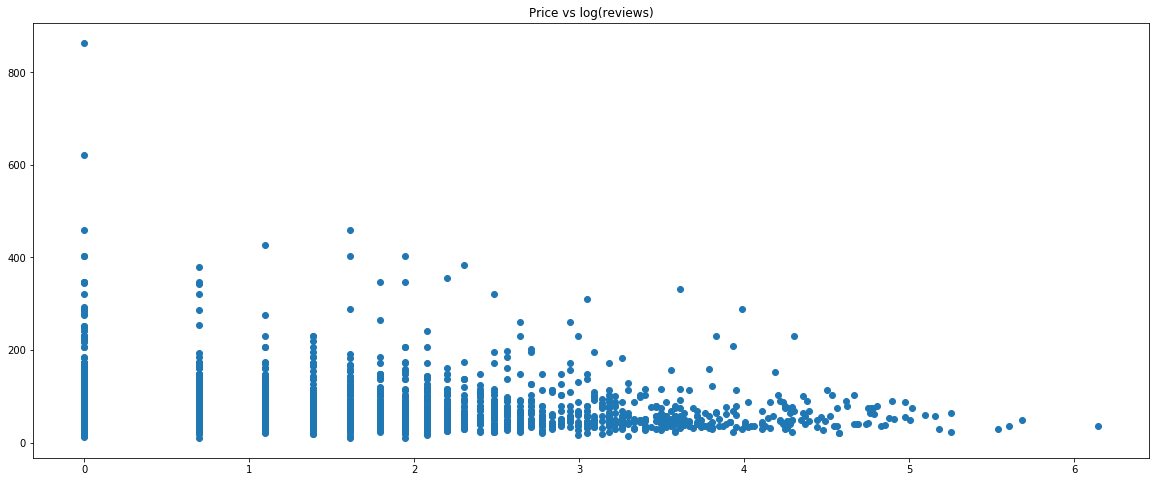

In [17]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+frankfurt['reviews']), frankfurt['price'])
plt.title('Price vs log(reviews)');

#### Satisfaction?

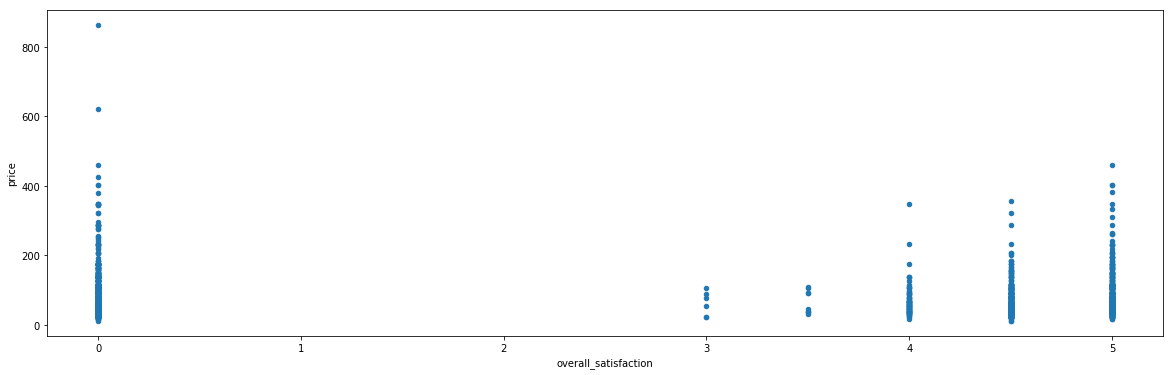

In [18]:
frankfurt.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6));

#### Bedrooms

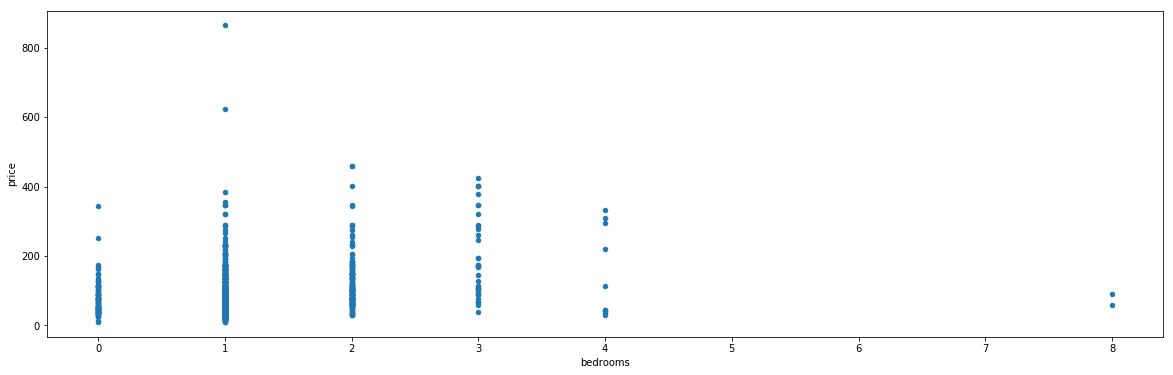

In [19]:
frankfurt.plot.scatter(x='bedrooms', y='price', figsize=(20,6));

#### Accommodates

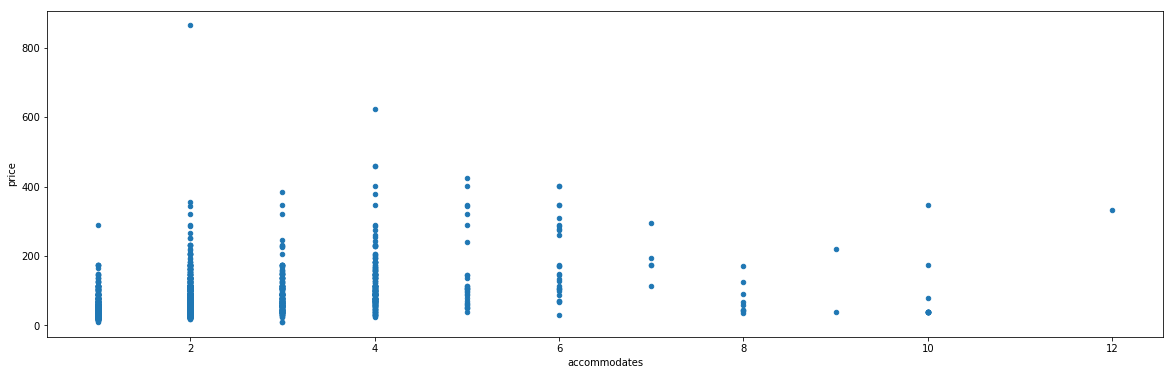

In [20]:
frankfurt.plot.scatter(x='accommodates', y='price', figsize=(20,6));

## Feature Engineering

Let's add some additional features based on our understanding to make the life easier for the Linear Regression algorithms

In [21]:
frankfurt['logreviews'] = np.log(1 + frankfurt['reviews'])
frankfurt['bedrooms_per_accommodates'] = frankfurt['bedrooms'] / frankfurt['accommodates']

In [22]:
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030,0.000000,0.500000
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627,0.000000,0.166667
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514,0.000000,0.500000


### Shall we remove properties without any reviews?
I would go for it ...

During this project we found out that properties with very few number of reviews are very difficult to predict. And we opted to fix the minimum number of reviews to 10. You may change this number and experiment how the results change.

In [23]:
data = frankfurt.copy()
print('amount of data original: ' + str(len(data)))
data = data[data['reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
print('amount of data after removing "few reviews" properties: ' + str(len(data)))

amount of data original: 1995
amount of data after removing "few reviews" properties: 493


Let's encode the room_type and neighborhood using one-hot encoding. E.g. for split the neighborhood variable in as many different neighborhoods are, and set all to 0 except for the right neighborhood, which will be set to 1. More info in: https://en.wikipedia.org/wiki/One-hot

In [24]:
data = pd.get_dummies(data)
data.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,...,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
0,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000,0,...,0,0,0,0,0,0,0,0,0,0
1,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000,0,...,0,0,0,0,0,0,0,0,1,0
6,21,4.5,2,1.0,109.0,50.116308,8.679903,3.091042,0.500000,0,...,0,0,0,0,0,0,0,0,0,0
10,31,4.5,3,1.0,79.0,50.114359,8.685874,3.465736,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
14,15,5.0,2,1.0,60.0,50.107130,8.626485,2.772589,0.500000,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X = data.copy().drop('price', axis = 1)
y = data['price'].copy()

Split data in training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


Scale data to have similar dimensions

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline

In [28]:
baseline = y_train.median() #median train
print('If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: ' + str(baseline))

If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: 57.0


In [29]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 47.1899046065384


## Machine Learning

In [30]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [31]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 30.631052305737853, mrse_test: 677509406148890.5
Ridge mrse_train: 31.32304098021783, mrse_test: 34.791803147134644 best alpha: 100.0
Lasso mrse_train: 31.43232181185478, mrse_test: 34.16718989710831 best alpha: 1.0
ElasticNet mrse_train: 31.56566254997469, mrse_test: 34.41199228947752 best alpha: 1.0 best l1: 0.9


The testing error from Ridge, Lasso and ElasticNet are much better than the baseline testing errors !

Non-zero Lasso coefficients ordered by importance

In [32]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 18.653967048926283
bedrooms, 9.901891866645677
neighborhood_Westend-Nord, 6.560741105279131
overall_satisfaction, 5.319197012800603
neighborhood_Gallus, 4.972585149672787
accommodates, 4.235241149707108
neighborhood_Gutleutviertel, 3.9328494977940287
neighborhood_Fechenheim, 1.0643855768850217
neighborhood_Westend-Süd, 1.0131529422612837
neighborhood_Nied, 0.5527358488132461
neighborhood_Bockenheim, 0.5405469785877816
neighborhood_Sachsenhausen-N., 0.16467591306490312


## Error Analysis

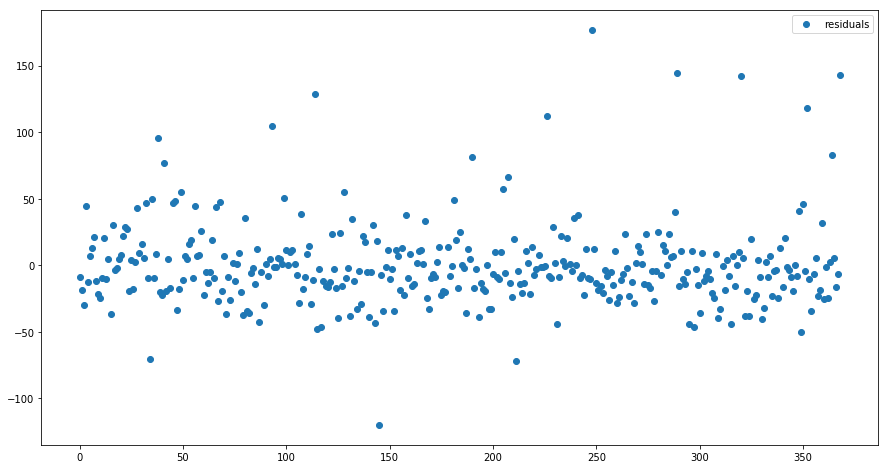

In [33]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [34]:
X_train[np.abs(diff) > 100].describe()

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,...,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.0,9.000000,9.0,9.0,9.0,9.0,9.0,9.000000,9.0,9.0
mean,32.888889,4.666667,5.111111,2.222222,50.104607,8.655607,3.356490,0.446296,0.777778,0.222222,...,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0
std,20.714997,0.353553,3.218868,1.301708,0.011531,0.025057,0.617839,0.112971,0.440959,0.440959,...,0.0,0.440959,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
min,11.000000,4.000000,2.000000,1.000000,50.089262,8.625551,2.484907,0.250000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,19.000000,4.500000,3.000000,1.000000,50.101233,8.634469,2.995732,0.333333,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,23.000000,4.500000,4.000000,2.000000,50.102222,8.653955,3.178054,0.500000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75%,45.000000,5.000000,6.000000,3.000000,50.107755,8.669467,3.828641,0.500000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
max,73.000000,5.000000,12.000000,4.000000,50.129872,8.699099,4.304065,0.600000,1.000000,1.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [35]:
high_error = X_train[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 12
size low error: 142


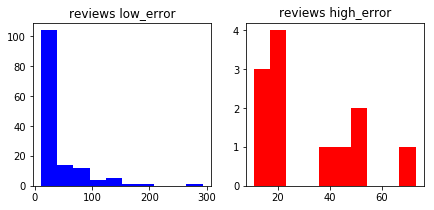

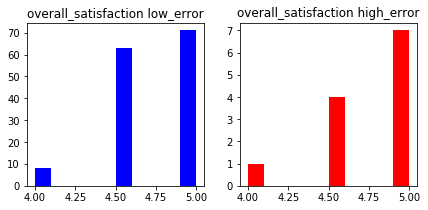

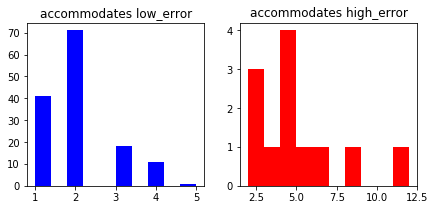

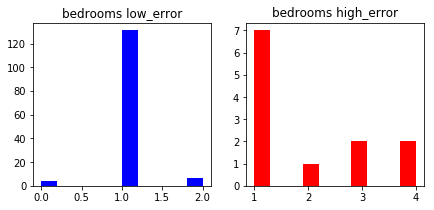

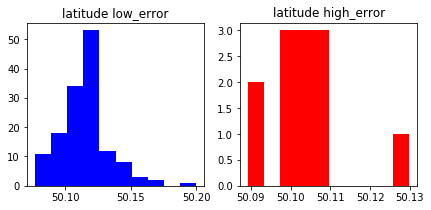

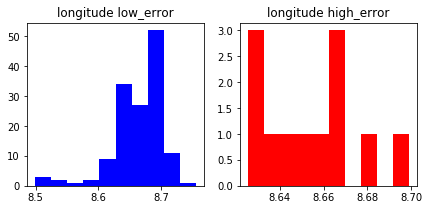

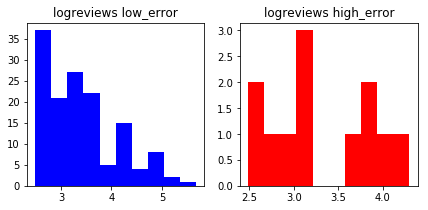

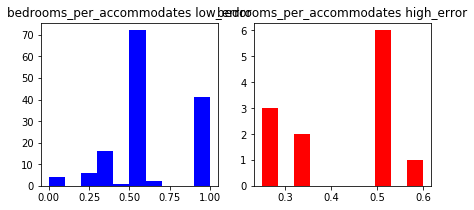

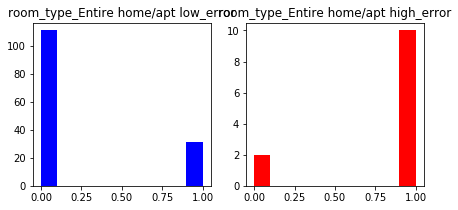

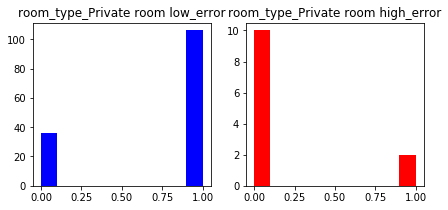

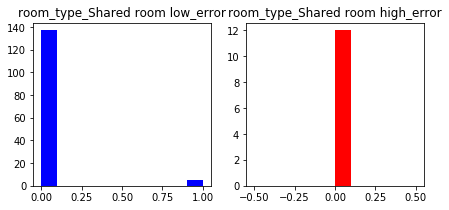

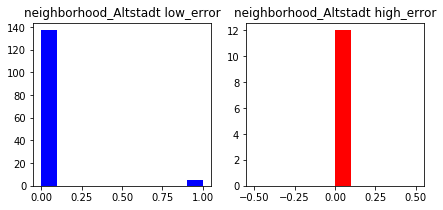

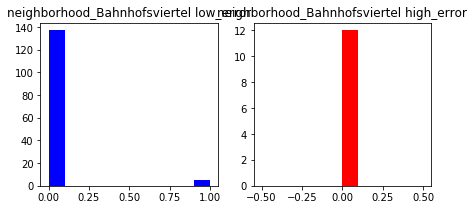

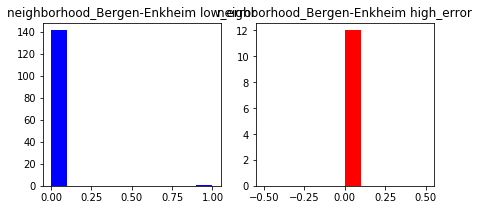

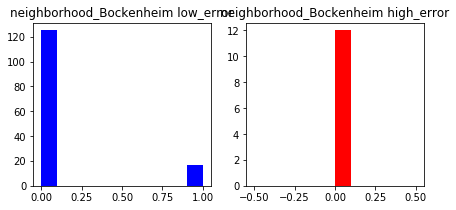

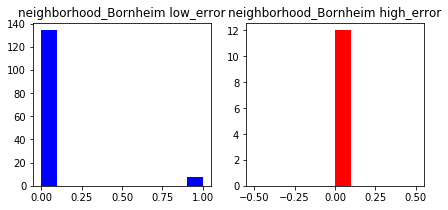

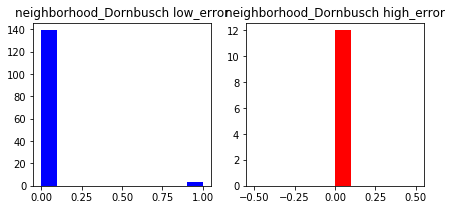

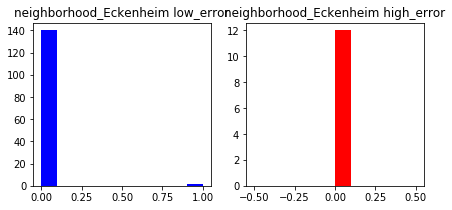

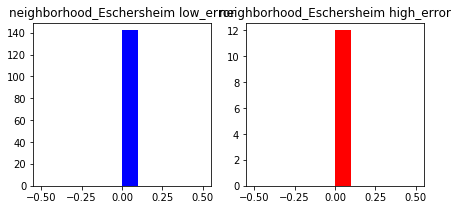

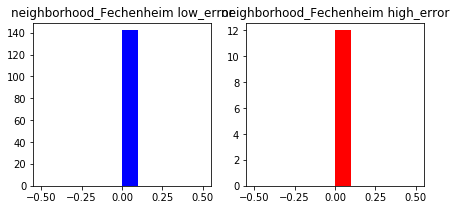

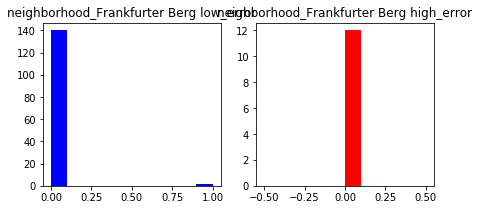

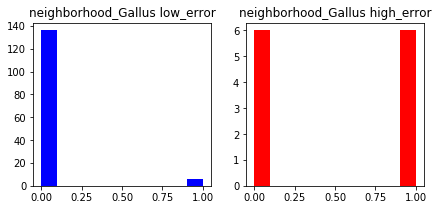

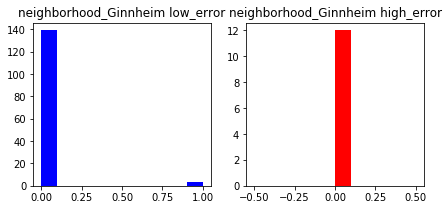

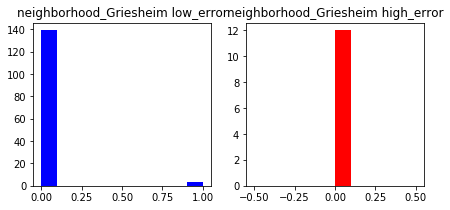

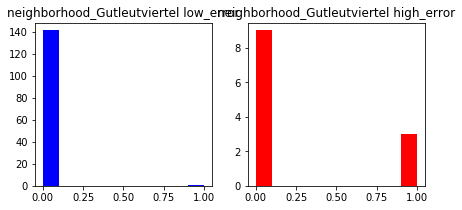

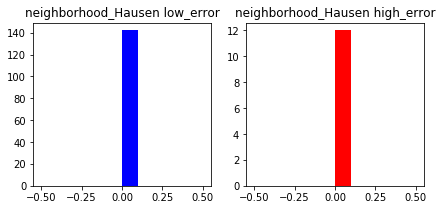

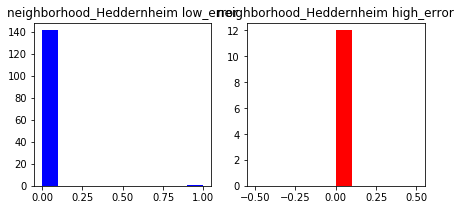

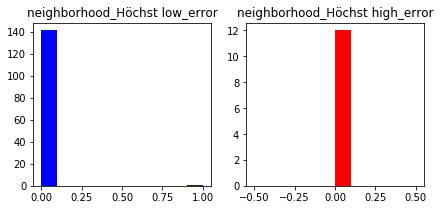

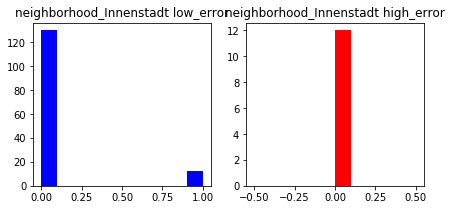

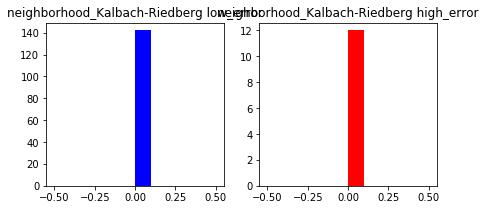

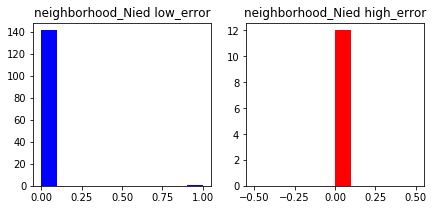

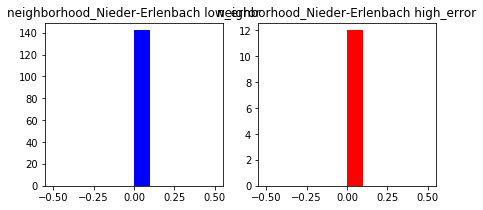

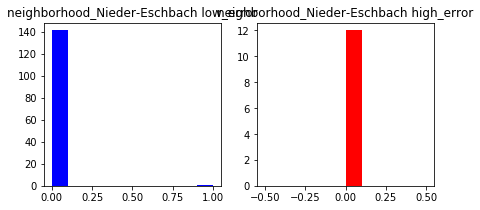

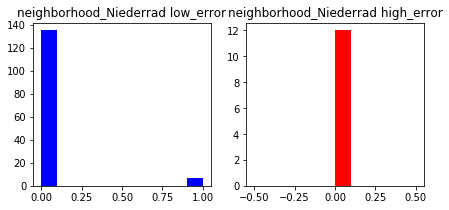

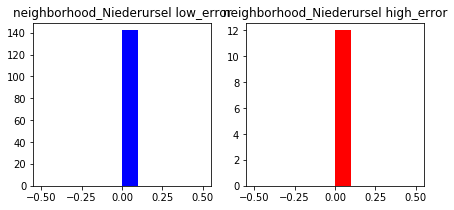

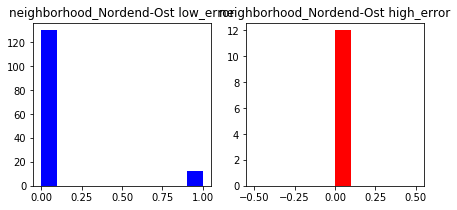

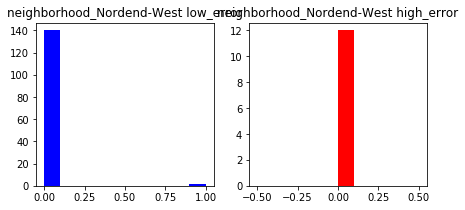

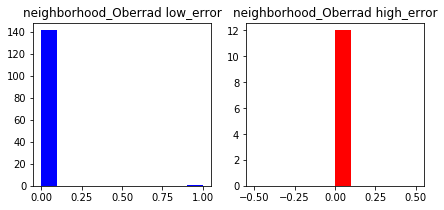

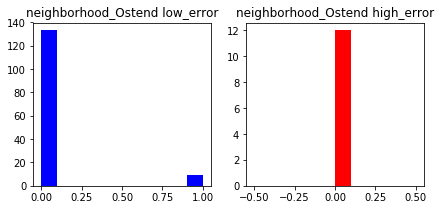

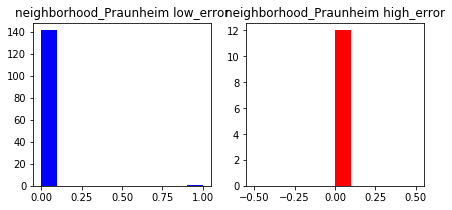

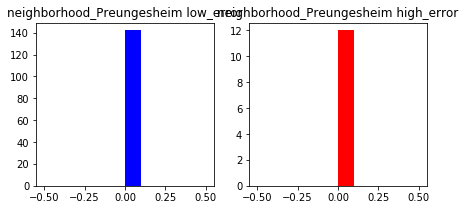

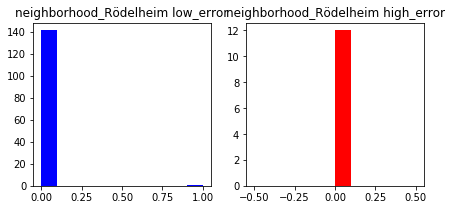

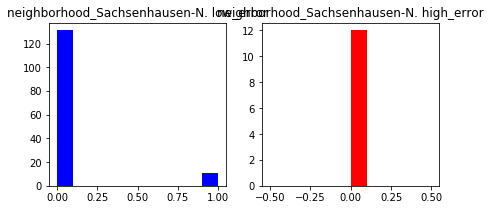

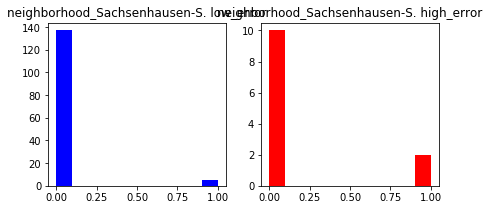

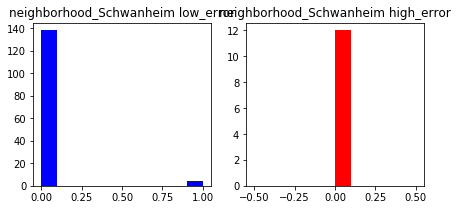

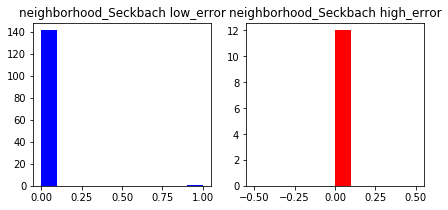

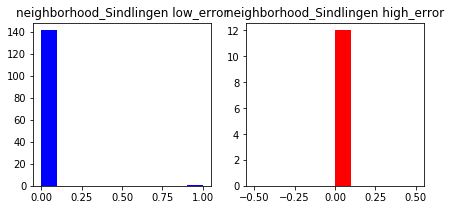

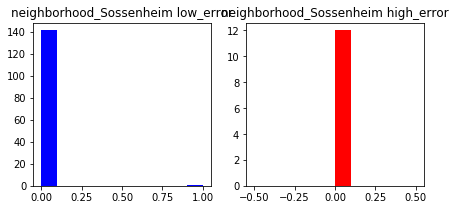

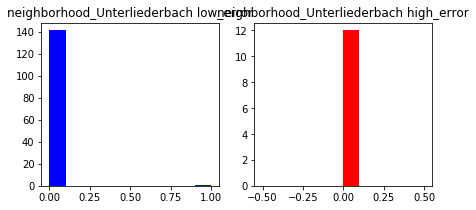

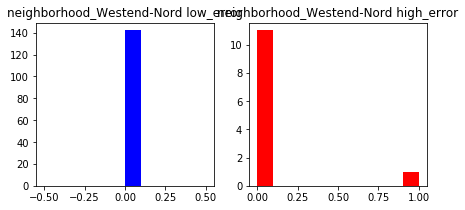

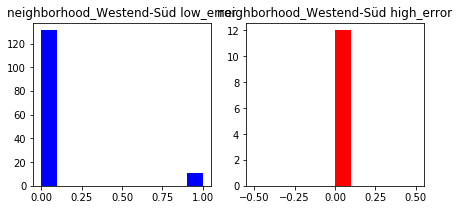

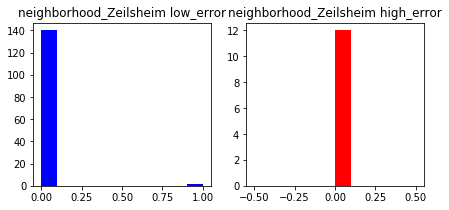

In [36]:


for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()

## This is how to do Polynomial Regression

In [37]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_train_scaled)
X_train_scaled = pf.transform(X_train_scaled)
X_test_scaled = pf.transform(X_test_scaled)

In [38]:
for model, name in zip([lr, ridge, lasso], ['LinearRegression', 'Ridge', 'Lasso']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

LinearRegression mrse_train: 17.37364523350725, mrse_test: 83322844964323.75
Ridge mrse_train: 27.603488386850938, mrse_test: 36.85497933721431


C:\Users\jamheras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso mrse_train: 24.765015082084858, mrse_test: 33.81992155696889


In [39]:
poly_features = pf.get_feature_names(X_train.columns)

In [40]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(poly_features[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 17.06857333561453
accommodates, 5.508669129276822
accommodates room_type_Entire home/apt, 5.474484002258369
bedrooms room_type_Entire home/apt, 4.650325284770139
overall_satisfaction, 4.021397330011996
bedrooms neighborhood_Westend-Nord, 3.6987815050080894
bedrooms neighborhood_Gallus, 3.3484602781944686
accommodates neighborhood_Westend-Nord, 2.9428760125511717
room_type_Entire home/apt neighborhood_Gutleutviertel, 2.809364756009057
bedrooms neighborhood_Nordend-West, 2.336028534058872
neighborhood_Gallus^2, 2.1404072299212036
overall_satisfaction accommodates, 2.1310895877567906
room_type_Entire home/apt neighborhood_Gallus, 1.7660959261257292
overall_satisfaction neighborhood_Bockenheim, 1.3588986284299083
overall_satisfaction neighborhood_Gutleutviertel, 1.3334540203128757
room_type_Shared room neighborhood_Innenstadt, 1.2032801540702356
overall_satisfaction neighborhood_Sachsenhausen-S., 1.1771090218012124
overall_satisfaction neighborhood_Westend-Nord, 